<a href="https://colab.research.google.com/github/TomBeagley/MEng-FYP/blob/main/3D_CNN_Iteration_2_(big_datset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

Import all training and validation data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Create Training data set (images and labels) (all pre-processed in "pre-processing" notebook)

In [ ]:
os.chdir("/content/gdrive/My Drive/FYP Data/FINAL DATA SET/labelsTr")

all_files = os.listdir()
#print(all_files)
#print()

# get all nifti files (images)
nii_files = filter(lambda x: x[-4:] == '.nii', all_files)
nii_files = list(nii_files)
nii_files = sorted(nii_files, key=lambda x: x.lower().replace("_", " "))
print(nii_files)
print()

# get all csv files (labels)
csv_files = filter(lambda x: x[-4:] == '.csv', all_files)
csv_files = list(csv_files)
csv_files = sorted(csv_files, key=lambda x: x.lower().replace("_", " "))
print(csv_files)

train_images = list()
train_labels = list()


# read-in each image and its data
for item in nii_files:
    file_name = item
    image = nib.load(file_name)
    image_data = image.get_fdata()
    train_images.append(image_data)

# read-in each data frame of labels
for item in csv_files:
    file_name = item
    df = pd.read_csv(file_name)
    train_labels.append(df)

['S02.nii', 'S03.nii', 'S04.nii', 'S08.nii', 'S09.nii', 'S10.nii', 'S100.nii', 'S101.nii', 'S102.nii', 'S103.nii', 'S104.nii', 'S105.nii', 'S106.nii', 'S107.nii', 'S108.nii', 'S109.nii', 'S11.nii', 'S110.nii', 'S111.nii', 'S112.nii', 'S113.nii', 'S114.nii', 'S115.nii', 'S116.nii', 'S117.nii', 'S118.nii', 'S119.nii', 'S120.nii', 'S121.nii', 'S122.nii', 'S123.nii', 'S124.nii', 'S14.nii', 'S15.nii', 'S16.nii', 'S18.nii', 'S19.nii', 'S26.nii', 'S27.nii', 'S28.nii', 'S30.nii', 'S31.nii', 'S33.nii', 'S35.nii', 'S36.nii', 'S37.nii', 'S38.nii', 'S40.nii', 'S42.nii', 'S43.nii', 'S45.nii', 'S46.nii', 'S47.nii', 'S48.nii', 'S49.nii', 'S50.nii', 'S51.nii', 'S52.nii', 'S53.nii', 'S54.nii', 'S55.nii', 'S56.nii', 'S57.nii', 'S58.nii', 'S59.nii', 'S60.nii', 'S61.nii', 'S62.nii', 'S63.nii', 'S64.nii', 'S65.nii', 'S66.nii', 'S67.nii', 'S68.nii', 'S69.nii', 'S70.nii', 'S71.nii', 'S72.nii', 'S73.nii', 'S74.nii', 'S75.nii', 'S76.nii', 'S77.nii', 'S78.nii', 'S79.nii', 'S80.nii', 'S81.nii', 'S82.nii', 'S83.n

Sample label from training dataset

In [ ]:
train_labels[0]

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,49,69,31,66,50,37,78,85,35


### Create Validation data set (images and labels) (all pre-processed in "pre-processing" notebook)

In [ ]:
os.chdir("/content/gdrive/My Drive/FYP Data/FINAL DATA SET/labelsVa")

all_files = os.listdir()
#print(all_files)
#print()

# get all nifti files (images)
nii_files = filter(lambda x: x[-4:] == '.nii', all_files)
nii_files = list(nii_files)
nii_files = sorted(nii_files, key=lambda x: x.lower().replace("_", " "))
print(nii_files)
print()

# get all csv files (labels)
csv_files = filter(lambda x: x[-4:] == '.csv', all_files)
csv_files = list(csv_files)
csv_files = sorted(csv_files, key=lambda x: x.lower().replace("_", " "))
print(csv_files)

validation_images = list()
validation_labels = list()


# read-in each image and its data
for item in nii_files:
    file_name = item
    image = nib.load(file_name)
    image_data = image.get_fdata()
    validation_images.append(image_data)

# read-in each data frame of labels
for item in csv_files:
    file_name = item
    df = pd.read_csv(file_name)
    validation_labels.append(df)

['S01.nii', 'S05.nii', 'S125.nii', 'S126.nii', 'S127.nii', 'S128.nii', 'S129.nii', 'S13.nii', 'S17.nii', 'S32.nii', 'S34.nii', 'S41.nii', 'S44.nii']

['S01_labels.csv', 'S05_labels.csv', 'S125_labels.csv', 'S126_labels.csv', 'S127_labels.csv', 'S128_labels.csv', 'S129_labels.csv', 'S13_labels.csv', 'S17_labels.csv', 'S32_labels.csv', 'S34_labels.csv', 'S41_labels.csv', 'S44_labels.csv']


In [ ]:
validation_labels[0]

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,40,69,32,62,48,36,66,81,37


In [ ]:
os.chdir("/content/gdrive/My Drive/FYP Data/FINAL DATA SET/labelsTe")

all_files = os.listdir()
#print(all_files)
#print()

# get all nifti files (images)
nii_files = filter(lambda x: x[-4:] == '.nii', all_files)
nii_files = list(nii_files)
nii_files = sorted(nii_files, key=lambda x: x.lower().replace("_", " "))
print(nii_files)
print()

# get all csv files (labels)
csv_files = filter(lambda x: x[-4:] == '.csv', all_files)
csv_files = list(csv_files)
csv_files = sorted(csv_files, key=lambda x: x.lower().replace("_", " "))
print(csv_files)

test_images = list()
test_labels = list()


# read-in each image and its data
for item in nii_files:
    file_name = item
    image = nib.load(file_name)
    image_data = image.get_fdata()
    test_images.append(image_data)

# read-in each data frame of labels
for item in csv_files:
    file_name = item
    df = pd.read_csv(file_name)
    test_labels.append(df)

['S130.nii', 'S131.nii', 'S132.nii', 'S133.nii', 'S134.nii', 'S135.nii', 'S136.nii', 'S137.nii', 'S138.nii', 'S139.nii', 'S140.nii', 'S141.nii', 'S142.nii']

['S130_labels.csv', 'S131_labels.csv', 'S132_labels.csv', 'S133_labels.csv', 'S134_labels.csv', 'S135_labels.csv', 'S136_labels.csv', 'S137_labels.csv', 'S138_labels.csv', 'S139_labels.csv', 'S140_labels.csv', 'S141_labels.csv', 'S142_labels.csv']


### View data before putting into model

In [ ]:
train_images = tf.stack(train_images)
train_labels = np.array(train_labels)
train_labels = tf.stack(train_labels)

validation_images = tf.stack(validation_images)
validation_labels = np.array(validation_labels)
validation_labels = tf.stack(validation_labels)

test_images = tf.stack(test_images)
test_labels = np.array(test_labels)
test_labels = tf.stack(test_labels)



print("Train images shape:")
print(train_images.get_shape())
print("Train labels shape:")
print(train_labels.get_shape())

print(" ")

print("Validation images shape:")
print(validation_images.get_shape())
print("Validation labels shape:")
print(validation_labels.get_shape())

print(" ")

print("Test images shape:")
print(test_images.get_shape())
print("Test labels shape:")
print(test_labels.get_shape())

Train images shape:
(105, 128, 128, 64)
Train labels shape:
(105, 1, 9)
 
Validation images shape:
(13, 128, 128, 64)
Validation labels shape:
(13, 1, 9)
 
Test images shape:
(13, 128, 128, 64)
Test labels shape:
(13, 1, 9)


In [ ]:
os.chdir("/content/gdrive/My Drive/FYP Data")

In [ ]:
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

### 3D CNN Model

In [ ]:
# Define the input shape
input_shape = (105, 128, 128, 64, 1)

# Define the model architecture
model = keras.Sequential(
    [
        # First convolutional layer
        layers.Conv3D(32, kernel_size=(3, 3, 3), activation="relu", input_shape=input_shape[1:]),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv3D(64, kernel_size=(3, 3, 3), activation="relu"),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv3D(128, kernel_size=(3, 3, 3), activation="relu"),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Fourth convolutional layer
        layers.Conv3D(256, kernel_size=(3, 3, 3), activation="relu"),
        layers.MaxPooling3D(pool_size=(2, 2, 2)),
        layers.BatchNormalization(),

        # Flatten the output of the convolutional layers
        layers.Flatten(),

        # First dense layer
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.3),

        # Second dense layer
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),

        # Output layer with three (changed to 9 as need 3 for each of the 3 endpoints) nodes for the x, y, and z coordinates of the pulmonary artery endpoints
        #layers.Dense(3, activation="softmax"),
        layers.Dense(9, activation="linear"), # doing a regression task right?
    ]
)

In [ ]:
# Compile the model with the appropriate loss function and optimizer
model.compile(
    loss="mean_squared_error", # again, regression task so use this instead of "binary_crossentropy" or "categorical_crossentropy"?
    optimizer=keras.optimizers.Adam(),
    metrics=["mean_absolute_error", "mean_squared_error", tf.keras.metrics.RootMeanSquaredError()],
)

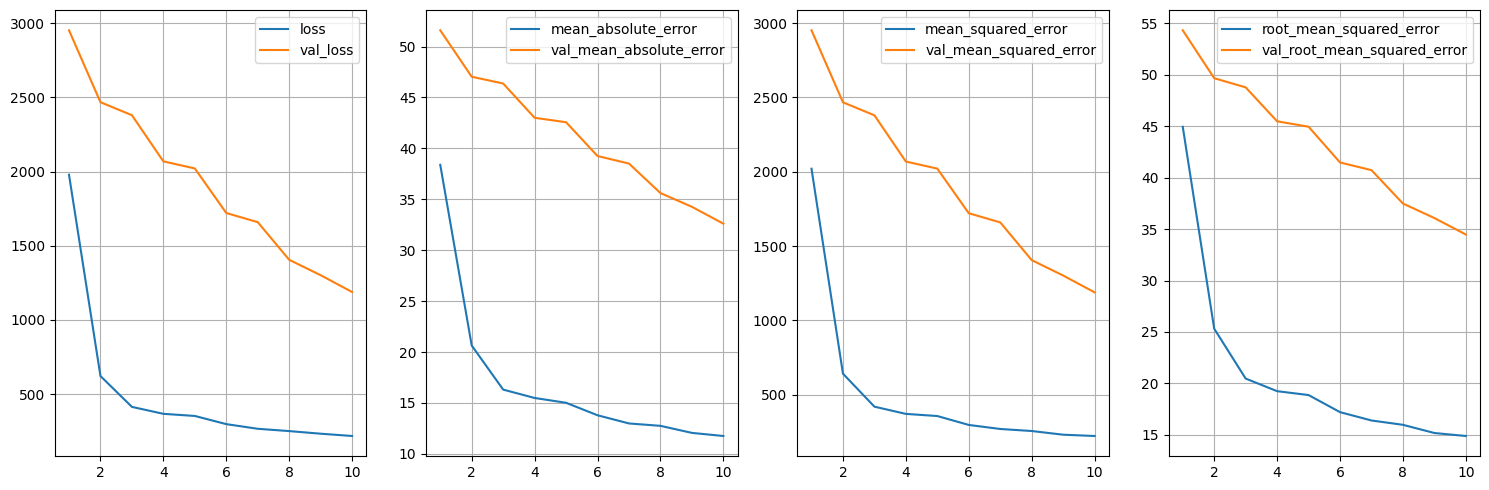

4/4 [==============================] - 617s 144s/step - loss: 218.1033 - mean_absolute_error: 11.7606 - mean_squared_error: 221.5620 - root_mean_squared_error: 14.8850 - val_loss: 1188.2024 - val_mean_absolute_error: 32.6084 - val_mean_squared_error: 1188.2024 - val_root_mean_squared_error: 34.4703


In [ ]:
callbacks_list = [PlotLearning()]
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(validation_images, validation_labels),
                    callbacks=callbacks_list)

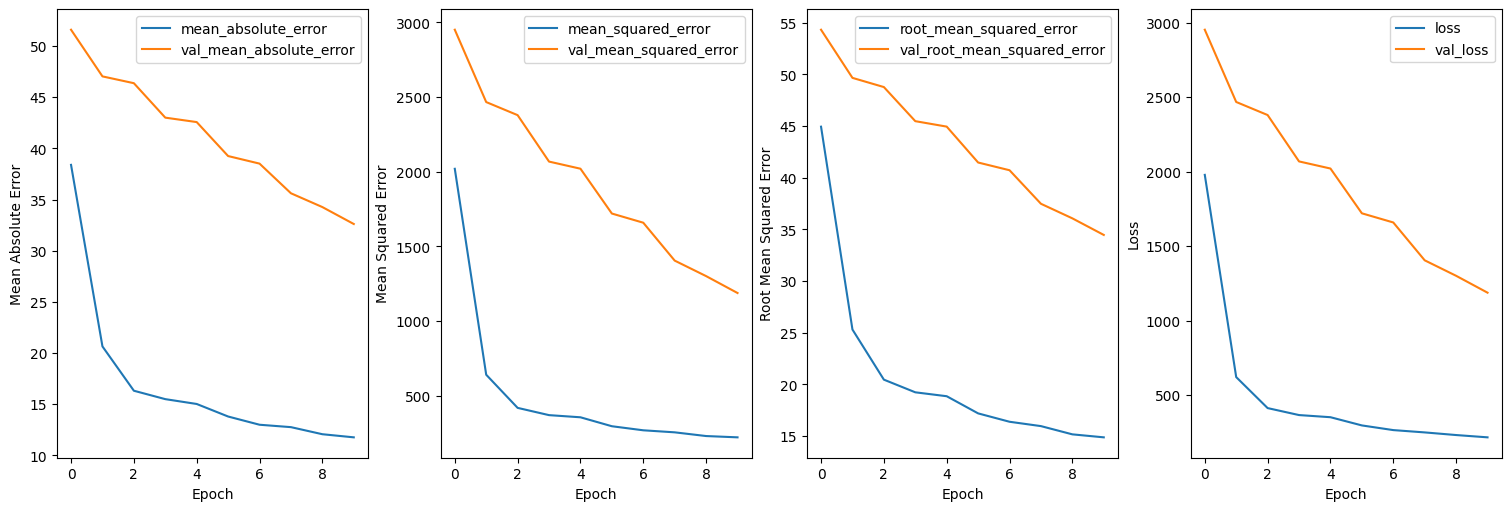

In [ ]:
# Evaluate model
fig, ax = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)

ax[0].plot(history.history['mean_absolute_error'], label='mean_absolute_error')
ax[0].plot(history.history['val_mean_absolute_error'], label = 'val_mean_absolute_error')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_ylim()
ax[0].legend(loc='upper right')

ax[1].plot(history.history['mean_squared_error'], label='mean_squared_error')
ax[1].plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_ylim()
ax[1].legend(loc='upper right')

ax[2].plot(history.history['root_mean_squared_error'], label='root_mean_squared_error')
ax[2].plot(history.history['val_root_mean_squared_error'], label = 'val_root_mean_squared_error')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Root Mean Squared Error')
ax[2].set_ylim()
ax[2].legend(loc='upper right')

ax[3].plot(history.history['loss'], label='loss')
ax[3].plot(history.history['val_loss'], label = 'val_loss')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Loss')
ax[3].set_ylim()
ax[3].legend(loc='upper right')

In [ ]:
#SAVE
model.save("/content/gdrive/My Drive/FYP Data/CNN MODEL v1 ALL DATA")

# load model back:
# loaded_model = keras.models.load_model("/content/gdrive/My Drive/FYP Data/CNN MODEL v1 ALL DATA")

In [ ]:
# TEST DATA SET

os.chdir("/content/gdrive/My Drive/FYP Data/FINAL DATA SET/labelsTe")

all_files = os.listdir()
#print(all_files)
#print()

# get all nifti files (images)
nii_files = filter(lambda x: x[-4:] == '.nii', all_files)
nii_files = list(nii_files)
nii_files = sorted(nii_files, key=lambda x: x.lower().replace("_", " "))
print(nii_files)
print()

# get all csv files (labels)
csv_files = filter(lambda x: x[-4:] == '.csv', all_files)
csv_files = list(csv_files)
csv_files = sorted(csv_files, key=lambda x: x.lower().replace("_", " "))
print(csv_files)

test_images = list()
test_labels = list()


# read-in each image and its data
for item in nii_files:
    file_name = item
    image = nib.load(file_name)
    image_data = image.get_fdata()
    test_images.append(image_data)

# read-in each data frame of labels
for item in csv_files:
    file_name = item
    df = pd.read_csv(file_name)
    test_labels.append(df)

test_images = tf.stack(test_images)
test_labels = np.array(test_labels)
test_labels = tf.stack(test_labels)

os.chdir("/content/gdrive/My Drive/FYP Data")

['S130.nii', 'S131.nii', 'S132.nii', 'S133.nii', 'S134.nii', 'S135.nii', 'S136.nii', 'S137.nii', 'S138.nii', 'S139.nii', 'S140.nii', 'S141.nii', 'S142.nii']

['S130_labels.csv', 'S131_labels.csv', 'S132_labels.csv', 'S133_labels.csv', 'S134_labels.csv', 'S135_labels.csv', 'S136_labels.csv', 'S137_labels.csv', 'S138_labels.csv', 'S139_labels.csv', 'S140_labels.csv', 'S141_labels.csv', 'S142_labels.csv']


In [ ]:
# EVALUATE
# Returns the loss value & metrics values for the model in test mode.
test_loss, test_mae, test_mse, test_rmse = model.evaluate(test_images,  test_labels, verbose=2)

1/1 - 8s - loss: 1118.2905 - mean_absolute_error: 31.7965 - mean_squared_error: 1118.2905 - root_mean_squared_error: 33.4408 - 8s/epoch - 8s/step


In [ ]:
#TEST

# Test data
unseen_images = test_images

# Use model to make predictions
predicted_endpoints = model.predict(unseen_images)

# show the inputs and predicted outputs
for i in range(len(unseen_images)):
 print("endpoint predicted coordinates=%s, endpoint ground truth coordinates=%s" % (predicted_endpoints[i], test_labels[i]))

1/1 [==============================] - 9s 9s/step
endpoint predicted coordinates=[19.063774 30.749224 12.485241 29.922047 21.744967 15.897197 32.50592
 36.302456 15.449302], endpoint ground truth coordinates=tf.Tensor([[52 77 26 70 50 34 74 78 39]], shape=(1, 9), dtype=int64)
endpoint predicted coordinates=[18.819403 29.99226  12.351194 29.391651 21.489187 15.661915 31.851114
 35.70296  15.069947], endpoint ground truth coordinates=tf.Tensor([[55 81 28 76 64 34 86 82 38]], shape=(1, 9), dtype=int64)
endpoint predicted coordinates=[18.447815 30.342249 12.150175 29.54179  21.319092 15.754082 32.15341
 35.522118 15.186769], endpoint ground truth coordinates=tf.Tensor([[47 75 33 64 61 39 73 81 41]], shape=(1, 9), dtype=int64)
endpoint predicted coordinates=[19.200891 30.615528 12.507575 29.724869 21.779373 15.675943 32.608963
 36.12224  15.195457], endpoint ground truth coordinates=tf.Tensor([[51 71 36 70 45 36 84 64 41]], shape=(1, 9), dtype=int64)
endpoint predicted coordinates=[19.13429

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.3 MB/s eta 0:00:00


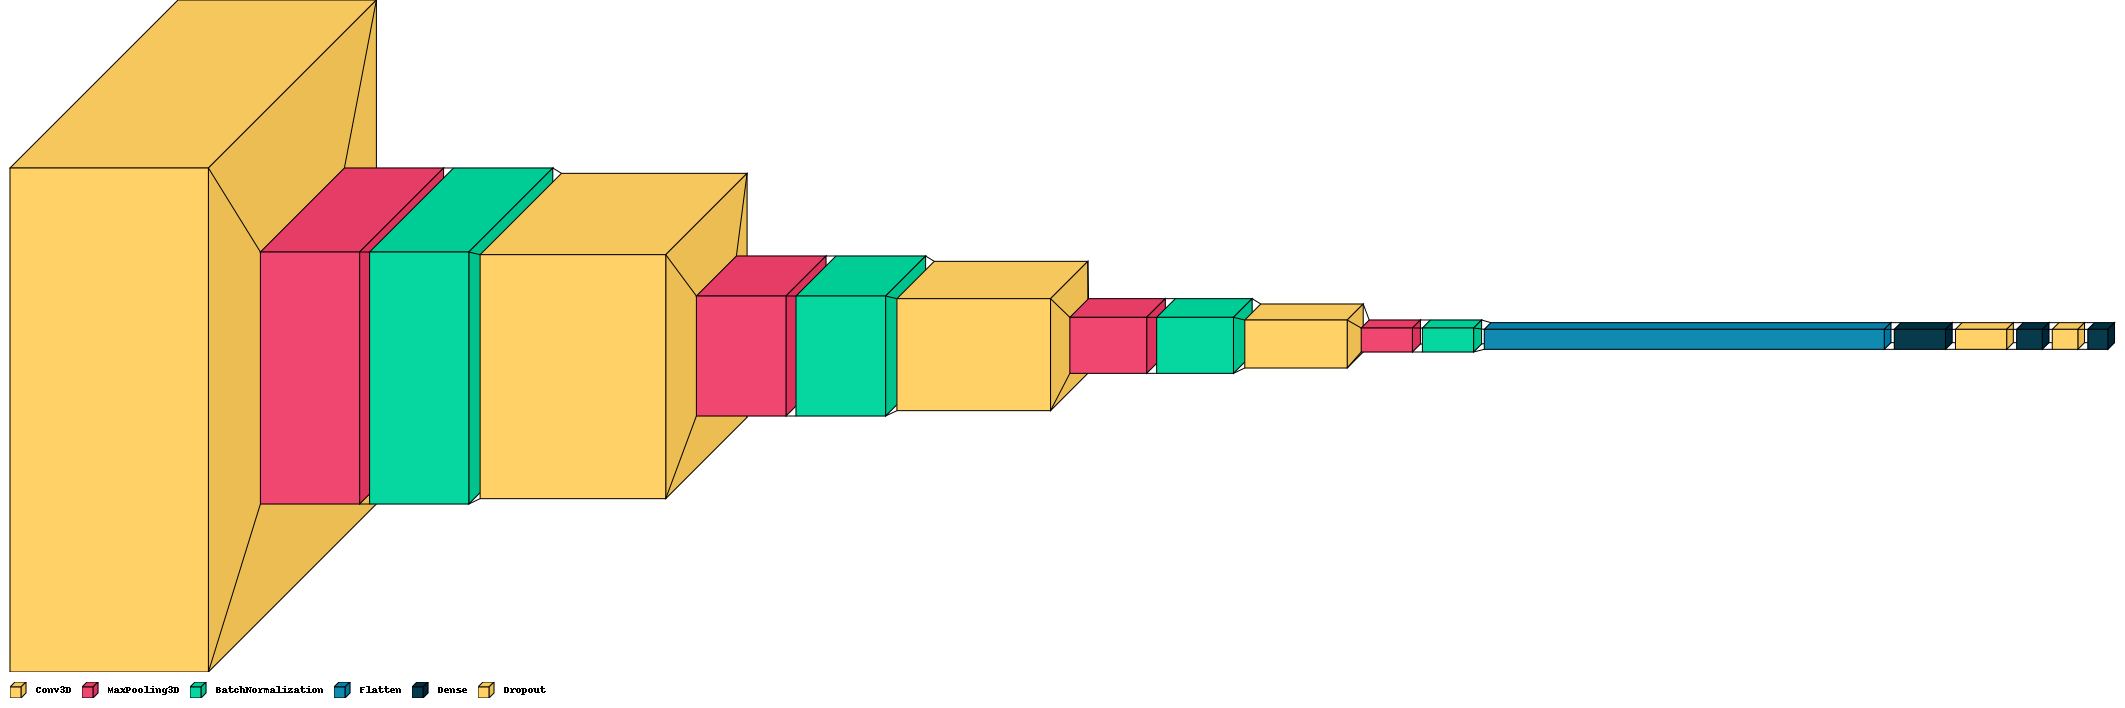

In [ ]:
!pip install visualkeras --q
import visualkeras

visualkeras.layered_view(model, legend=True).show()